# Notebook 2. SSH Open Marketplace data quality overview

This notebook offers an overview of the SSH Open Marketplace dataset and was built to help moderators to: 
1/ gain a better understanding of the SSH Open Marketplace data population; 2/ prioritising their curation tasks.  

It is composed of 5 sections:

0. Requirements to run the notebook
1. SSH Open Marketplace items provenance
2. Non-redundancy
3. Completeness & metadata quality
4. Activity coverage



## 0. Requirements to run the notebook

This section gives all the relevant information to "interact" with the MP data.



## 0.1 libraries
*There are a number of external libraries needed to run the notebook* 

*Furthermore, a dedicated SSH Open Marketplace library - sshmarketplacelib - with customised functions has been created and can be imported using the python import commands.* 

*Below the libraries import needed to run this notebook*

In [1]:
import pandas as pd #to manage dataframes
import matplotlib.pyplot as plt #to create histograms and images
import seaborn as sns #to create histograms and images
import json #to manage json objects
#import the MarketPlace Library 
from sshmarketplacelib import MPData as mpd
from sshmarketplacelib import  eval as eva, helper as hel

## 0.2 data(frame) download

The Notebook must download all the items that needs to be checked. The function

**getMPItems (itemscategory, localrepository, pages)**  

returns a dataframe containing all the MP items of the required category, additionally it add the dataframe to the notebook environment. The function parameters are:
<ul>
    <li> <i>itemscategory</i> the category of items, possible values are: 
        <ul>
            <li>toolsandservices</li>
            <li>publications</li>
            <li>trainingmaterials</li>
            <li>workflows</li>
            <li>datasets</li>
        </ul>
    </li>
    <li> <i>localrepository</i>, a Boolean value. If the localrepository parameter is set to 'False' or is not set, the items are downloaded from the MP dataset, if instead the localrepository parameter is set to 'True' the items are first searched in the local repository and if they are not present they are downloaded from the remote MP dataset. When the items are downloaded from the remote MP dataset they are stored in the local repository.</li>
<li><i> pages</i> the number of pages. If the pages parameter is not provided all descriptions are returned, otherwise 20*pages items are returned.</li>
</ul>

The following cell downloads data for all categories of items, every category of items is assigned to a variable.

In [2]:
mpdata = mpd()
df_tool_flat =mpdata.getMPItems ("toolsandservices", True)
df_publication_flat =mpdata.getMPItems ("publications", True)
df_trainingmaterials_flat =mpdata.getMPItems ("trainingmaterials", True)
df_workflows_flat =mpdata.getMPItems ("workflows", True)
df_datasets_flat =mpdata.getMPItems ("datasets", True)

getting data from local repository...
getting data from local repository...
getting data from local repository...
getting data from local repository...
getting data from local repository...


In [3]:
help(mpdata.getMPItems)

Help on method getMPItems in module sshmarketplacelib.mpdata:

getMPItems(itemscategory, localrepository=False, pages=0) method of sshmarketplacelib.mpdata.MPData instance
    Loads data from MP dataset. This method creates a dataframe, stores it in a local repository and returns it to the caller.
    
    Parameters:
    -----------
    
    itemscategory : str
        The category of items
    localrepository : boolean, optional
        Indicates if the user wants the local dataset if present, if not present the remote dataset is used 
    pages : int, optional
        The number of pages, default is all
    
    Returns:
    --------
    
    DataFrame: Returning value
    
    If the localrepository parameter is 'False' or is defined, the items are downloaded from the MP dataset, 
    if the localrepository parameter is 'True' the items are first searched in the local repository 
    and if they are not present they are downloaded from the remote MP dataset. 
    When the items are

## 0.2.1 first look into the data
It can be useful to display the structure of the table. In the next cell the structure of the __df_tool_flat__ table (or dataframe) is shown. Note that all tables obtained with the getMPItems function have the same structure. 

This dataframe returns MP attributes as defined in the MP data model (see: https://doi.org/10.5281/zenodo.5749464).

In [4]:
df_tool_flat.tail()



,id,category,label,persistentId,lastInfoUpdate,status,description,contributors,properties,externalIds,...,source.url,source.urlTemplate,version,thumbnail.info.mediaId,thumbnail.info.category,thumbnail.info.filename,thumbnail.info.mimeType,thumbnail.info.hasThumbnail,thumbnail.info.location.sourceUrl,thumbnail.caption
1690,27963,tool-or-service,Zoomify,NR5Mbp,2021-11-23T17:19:03+0000,approved,A suite of products developed for web designer...,"[{'actor': {'id': 2029, 'name': 'Zoomify Inc.'...","[{'type': {'code': 'keyword', 'label': 'Keywor...",[],...,http://tapor.ca,http://tapor.ca/tools/{source-item-id},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1691,28524,tool-or-service,Zotero,dY3lIq,2021-11-23T17:30:28+0000,approved,"Zotero is a free tool that collects, manages a...",[],"[{'type': {'code': 'terms-of-use', 'label': 'T...","[{'identifierService': {'code': 'GitHub', 'lab...",...,http://tapor.ca,http://tapor.ca/tools/{source-item-id},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1692,28789,tool-or-service,ZotFile,KlkkWa,2021-11-23T17:35:49+0000,approved,Zotero add-on for Firefox to manage your attac...,"[{'actor': {'id': 2624, 'name': 'Joscha Legewi...","[{'type': {'code': 'keyword', 'label': 'Keywor...","[{'identifierService': {'code': 'GitHub', 'lab...",...,http://tapor.ca,http://tapor.ca/tools/{source-item-id},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1693,28322,tool-or-service,Zotpress,YoTO6a,2021-11-23T17:26:18+0000,approved,Zotpress is a WordPress plugin that enables us...,"[{'actor': {'id': 2291, 'name': 'Katie Seaborn...","[{'type': {'code': 'terms-of-use', 'label': 'T...","[{'identifierService': {'code': 'GitHub', 'lab...",...,http://tapor.ca,http://tapor.ca/tools/{source-item-id},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1694,28071,tool-or-service,Zubrag HTML Tags Stripper,I1kFsQ,2021-11-23T17:21:12+0000,approved,This tool simply takes HTML and returns it wit...,"[{'actor': {'id': 2842, 'name': 'N/A', 'extern...","[{'type': {'code': 'terms-of-use', 'label': 'T...",[],...,http://tapor.ca,http://tapor.ca/tools/{source-item-id},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. SSH Open Marketplace items provenance

We want to know where all the items of the Marketplace come from. Some items have been mass ingested from third parties sources - https://marketplace-api.sshopencloud.eu/api/sources - and the *informationContributor.username* is *System importer*; some items have been created by individual users, in this latter case, the *informationContributor.username* is NOT *System importer*.

We want to have an overview of the items provenance: how many items come from source X, how many items have been created by individual users.   


### 1.1 Items coming from mass ingest = from 3d party sources

We use the function *getAllItemsBySources()*, it returns a *dataframe* (table) that contains two columns: in the first column there is the name of the source, in the second the number of items.  
The following code shows also a possible way to print the content of the dataframe.

In [5]:
utils=hel.Util()
#get the dataframe
df_items_by_sources=utils.getAllItemsBySources()
#prints the content of the dataframe
df_items_by_sources.head(10)

dblp: DH Publications            2810
TAPoR                            1337
SSK Zotero Resources              355
Humanities Data                   302
The Programming Historian         169
NA                                114
DARIAH-CAMPUS                      80
Language Resource Switchboard      51
EOSC Catalogue                     30
Standardization Survival Kit       25
Name: source.label, dtype: int64

The following cell uses the function *plot* of the dataframe to draw a bar chart. 

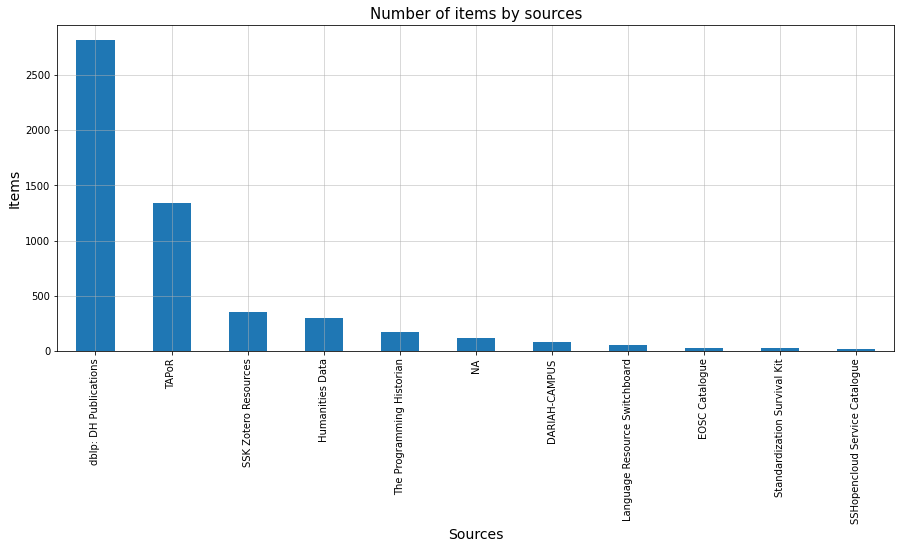

In [6]:
fig, ax = plt.subplots()
df_items_by_sources.plot(kind='bar', figsize=(15,6))
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of items by sources", fontsize=15)
ax.set_xlabel('Sources', fontsize=14)
ax.set_ylabel('Items', fontsize=14);
plt.show()

### Item Categories by source providers

In [7]:
df_categories_bysources=utils.getCategoriesBySources()
df_categories_bysources

source.label,DARIAH-CAMPUS,EOSC Catalogue,Humanities Data,Language Resource Switchboard,SSHopencloud Service Catalogue,SSK Zotero Resources,Standardization Survival Kit,TAPoR,The Programming Historian,dblp: DH Publications
Categories,,,,,,,,,,
dataset,0.0,0.0,302.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
publication,0.0,0.0,0.0,0.0,0.0,136.0,0.0,0.0,0.0,2810.0
tool-or-service,0.0,30.0,0.0,51.0,18.0,156.0,0.0,1337.0,0.0,0.0
training-material,80.0,0.0,0.0,0.0,2.0,63.0,0.0,0.0,169.0,0.0
workflow,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0


### 1.2 Items created by individual users 

*To be added*

## 2. Non-redundancy

the same entity should only be referenced once in the SSH Open Marketplace. Duplicate items are merged to ensure the coherence of the items showcased in the portal. This notebook is used to IDENTIFY duplicates and get a general idea of the number of potential duplicates present in the MP. **To suggest items merging, see and run notebook 4.1Duplicated_Item_process**

### 2.1 Identification of the duplicates

Duplicates are individuated for every category by defining the attributes that should be inspected to identify equal items. In the next cell the function __getDuplicates(category, attributes)__ is invoked to get for every category the subset of items having the same value in the 'attribute' `label`, each set of duplicated items is stored in a variable.

In [8]:
df_tool_duplicates=utils.getDuplicates(df_tool_flat, 'label')
df_publication_duplicates=utils.getDuplicates(df_publication_flat, 'label')
df_trainingmaterials_duplicates=utils.getDuplicates(df_trainingmaterials_flat, 'label')
df_workflows_duplicates=utils.getDuplicates(df_workflows_flat, 'label')
df_datasets_duplicates=utils.getDuplicates(df_datasets_flat, 'label')

## 2.1.1
*The  sets of duplicated items can be inspected, in the next cell the number of items with the same label for every category is shown*

In [9]:
print (f'There are: {df_tool_duplicates.shape[0]} duplicated tools, {df_publication_duplicates.shape[0]} duplicated publications,'
       +f' {df_trainingmaterials_duplicates.shape[0]} duplicated training materials,'+
      f' {df_workflows_duplicates.shape[0]} duplicated workflows,'+
      f' {df_datasets_duplicates.shape[0]} duplicated datasets')
    

There are: 14 duplicated tools, 4 duplicated publications, 2 duplicated training materials, 0 duplicated workflows, 0 duplicated datasets


In the next cells the number of items with the same accessibleAt is individuated

In [10]:
df_tool_duplicates_3=utils.getDuplicates(df_tool_flat, 'accessibleAt')
df_tool_duplicates_3=df_tool_duplicates_3[df_tool_duplicates_3['accessibleAt'].str.len()>0]
df_tool_duplicates_3.shape[0]

83

In [11]:

df_tool_duplicates_3[['MPUrl', 'label', 'accessibleAt']].sort_values('accessibleAt').head(12)

,MPUrl,label,accessibleAt
44,tool-or-service/tAGITn,Alveo,http://alveo.edu.au/
45,tool-or-service/sJVV15,Alveo Virtual Laboratory,http://alveo.edu.au/
197,tool-or-service/Ntf7jP,CHNM: Scribe,http://chnm.gmu.edu/tools/scribe/
1153,tool-or-service/pxZXbd,Scribe,http://chnm.gmu.edu/tools/scribe/
289,tool-or-service/GQE5se,CorpusSearch 2,http://corpussearch.sourceforge.net/
288,tool-or-service/lvtnwT,CorpusSearch,http://corpussearch.sourceforge.net/
759,tool-or-service/ShyS5V,LIWC (Linguistic Inquiry and Word Count),http://liwc.wpengine.com/
743,tool-or-service/grnqNn,Linguistic Inquiry and Word Count,http://liwc.wpengine.com/
1280,tool-or-service/qUZguv,Stanford Vis Group: Protovis,http://mbostock.github.io/protovis/
1069,tool-or-service/qDX6aU,Protovis,http://mbostock.github.io/protovis/


## 2.1.2

*It's possible to see the values of some of the duplicated items. In the next cell there is a command to show 4 items of the dataset for duplicated training materials.*

In [12]:
df_trainingmaterials_duplicates.head(4)

,MPUrl,id,category,label,persistentId,lastInfoUpdate,status,description,contributors,properties,...,source.url,source.urlTemplate,dateCreated,dateLastUpdated,thumbnail.info.mediaId,thumbnail.info.category,thumbnail.info.location.sourceUrl,thumbnail.info.mimeType,thumbnail.info.hasThumbnail,thumbnail.info.filename
45,training-material/KbYQxy,36300,training-material,ContextCapture tutorials,KbYQxy,2022-01-13T11:48:53+0000,approved,"To get started with ContextCapture, we recomme...",[],"[{'type': {'code': 'language', 'label': 'Langu...",...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,training-material/vySU0m,36303,training-material,ContextCapture tutorials,vySU0m,2022-01-13T11:48:54+0000,approved,"To get started with ContextCapture, we recomme...",[],"[{'type': {'code': 'language', 'label': 'Langu...",...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.1.3

As shown in the section __0.2.1__ of this notebook every row in the table includes 30 different attributes, it may be useful to define a list of attributes and use it when showing the data. In the next cell a list of attributes is defined and used as visualization mask for 6 items in the duplicated trainingmaterials dataset

In [13]:
# the list of attributes
vis_attr=['MPUrl', 'persistentId', 'label','description', 'source.label','accessibleAt']
df_trainingmaterials_duplicates[vis_attr].head(6)

,MPUrl,persistentId,label,description,source.label,accessibleAt
45,training-material/KbYQxy,KbYQxy,ContextCapture tutorials,"To get started with ContextCapture, we recomme...",SSK Zotero Resources,[https://www.acute3d.com/tutorials/]
46,training-material/vySU0m,vySU0m,ContextCapture tutorials,"To get started with ContextCapture, we recomme...",SSK Zotero Resources,[https://www.acute3d.com/tutorials/]


The list of attributes can be applied to all sets of duplicated items, in the next two cells it is used to filter attributes in the set of duplicated workflows and tools

In [14]:
df_workflows_duplicates[vis_attr].head(6)

,MPUrl,persistentId,label,description,source.label,accessibleAt


In [15]:
df_tool_duplicates[vis_attr].head(6)

,MPUrl,persistentId,label,description,source.label,accessibleAt
20,tool-or-service/3NqTBe,3NqTBe,Adobe Acrobat Reader,http://www.wikidata.org/entity/Q2634567,NaN,[]
21,tool-or-service/sc1bNI,sc1bNI,Adobe Acrobat Reader,http://www.wikidata.org/entity/Q60521777,NaN,[]
904,tool-or-service/4uAhJc,4uAhJc,NodeXL,http://www.wikidata.org/entity/Q16958587,NaN,[]
905,tool-or-service/mLLrAv,mLLrAv,NodeXL,"NodeXL is a free, open source tool for generat...",NaN,[https://nodexl.com/]
1090,tool-or-service/89LRtg,89LRtg,Quill,http://www.wikidata.org/entity/Q105972409,NaN,[]
1091,tool-or-service/6FBpZK,6FBpZK,Quill,http://www.wikidata.org/entity/Q30325191,NaN,[]


## 3. Completeness & metadata quality

We want to know how complete the SSH Open Marketplace dataset is, i.e. what is the level of quality of metadata describing the items populating the Marketplace.
As the data model of the Marketplace differentiates between attributes and properties, we want to mix these two different fields in the overview provided in this section.

Because not all metadata fields have the same importance depending on the item types, a set of recommended fields have been idenitfied by the Editorial Team (the list is kept up-to-date as part of the front-end code of the MP https://gitlab.gwdg.de/sshoc/sshoc-marketplace-frontend/-/blob/main/config/forms.json).

This notebook is only used to provide generic information about the metadata quality. **Dedicated notebooks - 3.2CurationFlagDescription and 3.4CurationFlagCoverage - are built (on the same logic) to inform the MP editorial dashboard, via dedicated curation-flags.**

### 3.1 Null values

### 3.1.1 Null values in all attributes by item types
*There are a number of functions for null values. The function __getNullValues()__ returns a table where the columns are the category and the rows are the attributes. The number in the cell individuated by an attribute and a category indicates how many null values there are in that category for the attribute. The function calculates the table for all the categories downloaded in the notebook. In this sepcific case all datasets downloaded in section __0.2__. The next cell gets the null values and shows them* 

In [16]:
df_null_values=utils.getNullValues()
df_null_values[0].head(35)

/Users/cesare/eclipse-workspace/mplib/sshoccurationprod/sshmarketplacelib/helper.py:481: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ts_persistentId_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_items=pd.merge(df_items, df_prop_data_tmp, left_on='persistentId',right_on='ts_persistentId', how = 'outer').fillna(np.nan)


category,dataset,publication,tool-or-service,training-material,workflow
property: missed values,,,,,
accessibleAt,1,20,490,14,1
composedOf,308,2949,1695,318,0
concept.candidate,46,52,70,1,0
concept.code,46,52,70,1,0
concept.definition,307,2947,1557,318,18
concept.label,46,52,70,1,0
concept.notation,306,2947,651,237,9
concept.uri,46,52,70,1,0
concept.vocabulary.closed,46,52,70,1,0


### 3.1.2 Null values for a given set of attributes
*The function __getNullValues(attributes)__ returns a table where the columns are the categories and the rows are the attributes listed in the invocation.  The list of attributes should contain 1 or more attribute name separated by ','.
The number in the cell individuated by an attribute and a category indicates how many null values there are in that category for the attribute.  
The function calculates the table for all the dataset downloaded in the notebook. In this sepcific case all datasets downloaded in section __0.2__. The next cell searches for null values of properties: accessibleAt, description, contributors and relatedItems.* 

In [17]:
df_nullpart_values=utils.getNullValues('accessibleAt, contributors, relatedItems, description, discipline, keyword')
df_nullpart_values[0].head(6)

/Users/cesare/eclipse-workspace/mplib/sshoccurationprod/sshmarketplacelib/helper.py:481: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ts_persistentId_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_items=pd.merge(df_items, df_prop_data_tmp, left_on='persistentId',right_on='ts_persistentId', how = 'outer').fillna(np.nan)
/Users/cesare/eclipse-workspace/mplib/sshoccurationprod/sshmarketplacelib/helper.py:494: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ts_persistentId_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_items=pd.merge(left=df_items, right=tmp, left_on='persistentId', right_on='ts_persistentId', how = 'outer').fillna(np.nan)


category,dataset,publication,tool-or-service,training-material,workflow
property: missed values,,,,,
accessibleAt,1,20,490,14,1
contributors,3,67,226,57,0
relatedItems,307,2785,1509,257,26
description,0,2862,55,26,1
discipline,306,2948,1623,237,17
keyword,65,2944,279,64,7



*The function __getItemsWithNullValues(props, all)__ returns all items where the properties indicated in the list have null values.  
In the next cell:*

<ol>
    <li> <i>the function is invoked to get all items where the accessibleAt, contributors and relatedItems have null values, the parameter True means that all the attributes/properties in the list must be null in an item</i></li>
    <li> <i>the visualization mask is defined</i></li>
    <li> <i>some items are shown</i></li>
    </ol>
  

In [18]:
#1
df_items_null_values=utils.getItemsWithNullValues('accessibleAt, contributors, relatedItems', True)
#2
vis_items_mask=['MPUrl', 'persistentId', 'category', 'label', 'source.label','accessibleAt','contributors', 'relatedItems']
#3
df_items_null_values[vis_items_mask].head()

,MPUrl,persistentId,category,label,source.label,accessibleAt,contributors,relatedItems
74,tool-or-service/CqCK1n,CqCK1n,tool-or-service,API for Generations and Gender Programme (GGP),SSHopencloud Service Catalogue,NaN,NaN,NaN
93,tool-or-service/wLzD4H,wLzD4H,tool-or-service,Audio Survey Module Questionnaire and Fieldwor...,SSHopencloud Service Catalogue,NaN,NaN,NaN
229,tool-or-service/m5jJ5s,m5jJ5s,tool-or-service,Code for data exchange between TMT and open so...,SSHopencloud Service Catalogue,NaN,NaN,NaN
320,tool-or-service/8lXz8g,8lXz8g,tool-or-service,Data Confidentiality Schema for Sensitive Data,SSHopencloud Service Catalogue,NaN,NaN,NaN
414,tool-or-service/9McIgG,9McIgG,tool-or-service,ERAN Pilot: Specifications for Secure Remote A...,SSHopencloud Service Catalogue,NaN,NaN,NaN


### 3.1.3 A few functions to go further in the identification of items with null values in attributes

*The variable df_items_null_values contains the list of items where the values for accessibleAt, contributors and relatedItems are all null, we can inspect the dataset.  
How many items are in the dataset?  
The cell below prints the number of items in the dataset*

In [19]:

print (f'\n There are {df_items_null_values.shape[0]} items where the values in attributes accessibleAt, contributors, relatedItems are null \n')



 There are 15 items where the values in attributes accessibleAt, contributors, relatedItems are null 



*What are the sources?*

In [20]:
test=df_items_null_values.groupby('source.label').count()['label']
test

source.label
SSHopencloud Service Catalogue    12
TAPoR                              1
The Programming Historian          1
Name: label, dtype: int64

In [21]:
rend_nv_table_df=df_items_null_values[['MPUrl', 'category', 'source.label','label']]
clickable_nv_table = rend_nv_table_df.style.format({'MPUrl': utils.make_clickable})
clickable_nv_table

,MPUrl,category,source.label,label
74,tool-or-service/CqCK1n,tool-or-service,SSHopencloud Service Catalogue,API for Generations and Gender Programme (GGP)
93,tool-or-service/wLzD4H,tool-or-service,SSHopencloud Service Catalogue,Audio Survey Module Questionnaire and Fieldwork Implementation Guideline
229,tool-or-service/m5jJ5s,tool-or-service,SSHopencloud Service Catalogue,Code for data exchange between TMT and open source CAT software
320,tool-or-service/8lXz8g,tool-or-service,SSHopencloud Service Catalogue,Data Confidentiality Schema for Sensitive Data
414,tool-or-service/9McIgG,tool-or-service,SSHopencloud Service Catalogue,ERAN Pilot: Specifications for Secure Remote Access to Sensitive Research Data
487,tool-or-service/a47VVu,tool-or-service,SSHopencloud Service Catalogue,Framework for data use agreement
640,tool-or-service/CzWHtv,tool-or-service,SSHopencloud Service Catalogue,Interoperability Hub
661,tool-or-service/NvN0y8,tool-or-service,TAPoR,iTunesCyrFix
775,tool-or-service/2KpJe6,tool-or-service,SSHopencloud Service Catalogue,Making Data Findable by being Citable - Tools
1258,tool-or-service/AOHiq8,tool-or-service,SSHopencloud Service Catalogue,SSH Data repository service on EOSC


## 3.2 Description lengh
For the `description` attribute, there should not be any null_values (this is a mandatory attribute and it is automatically filled with "No description provided" when it is empty at the ingest stage), so we want to list the items with a description length less than 25 and more than 1500 characters.

In [22]:
import numpy as np
df_all_items=pd.concat([df_tool_flat, df_publication_flat, df_trainingmaterials_flat, df_workflows_flat, df_datasets_flat], ignore_index=True)
df_items = df_all_items.replace(utils.empty_description, np.nan)
# need to be added after last ingestion
tempemptystring=utils.empty_description.replace('.','')
df_items = df_items.replace(tempemptystring, np.nan)

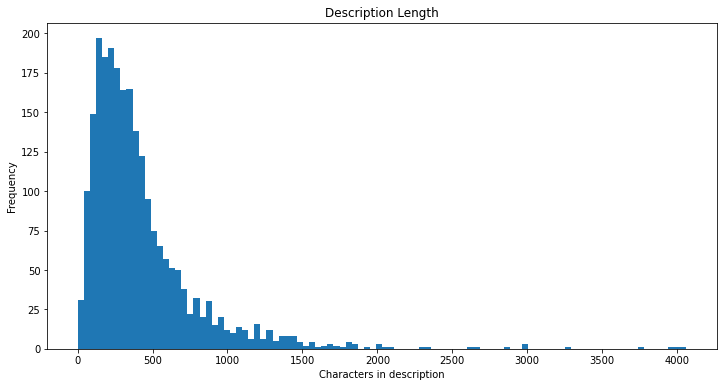

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_items['description'].str.len(),  bins=100)
ax.set_title('Description Length')
ax.set_xlabel('Characters in description')
ax.set_ylabel('Frequency');

In [24]:
minchars=25
maxchars=1500

df_items_d = df_items[(df_items['description'].notnull()) & (df_items['description'].str.len()>=minchars) & (df_items['description'].str.len()<=maxchars)]

df_items_min = df_items[(df_items['description'].notnull()) & (df_items['description'].str.len()<minchars)]

df_items_max = df_items[(df_items['description'].notnull()) & (df_items['description'].str.len()>maxchars)]

print (f"\nThere are {df_items['description'].isna().sum()} items with empty descriptions, "+
       f" {df_items_min['description'].count()} items with description shorter than {minchars} characters,"+
f" {df_items_max['description'].count()} Items with description longer than {maxchars} characters, "+
      f" {df_items_d['description'].count()} Items with description between {minchars} and {maxchars} characters.")
       


There are 2944 items with empty descriptions,  3 items with description shorter than 25 characters, 41 Items with description longer than 1500 characters,  2308 Items with description between 25 and 1500 characters.


The distribution of empty descriptions in items by item sources

In [25]:
df_empty_desc=df_items[df_items['description'].isna()]
df_empty_desc.groupby('source.label').count()['label']

source.label
SSK Zotero Resources             131
Standardization Survival Kit       1
TAPoR                              4
The Programming Historian          2
dblp: DH Publications           2806
Name: label, dtype: int64

*The next cell creates a table with a clickable url for items having description shorter than 25 characters*

In [26]:
rend_desc_table_df=df_items_min[['MPUrl', 'category', 'source.label','label', 'description']]
clickable_shortdesc_table = rend_desc_table_df.style.format({'MPUrl': utils.make_clickable})
clickable_shortdesc_table

,MPUrl,category,source.label,label,description
194,tool-or-service/o2X2Sl,tool-or-service,TAPoR,Chartle,Create simple charts.
917,tool-or-service/5jMQ6a,tool-or-service,SSK Zotero Resources,Offline Getting Started and Manual (pdf),Last Update: 14.12.2017
3406,publication/vwL2JV,publication,SSK Zotero Resources,Multitemporal 3D modelling for cultural heritage emergency during seismic events: Damage assesment of S. Agostino church in Amatrice (RI),6


## 4. Activity coverage

We want to see an overview of the activity coverage in the Marketplace dataset, in a dedicated section of the notebook, because this is an important field. The dynamic property `activity` is using a the TaDIRAH taxonomy: https://vocabs.dariah.eu/tadirah/ We want to see the number of items per concept used for the property `activity` and the number of items without values in activity.

In [27]:
#the type.code value used as filter value
typecode='activity'
df_list_of_properties_sources=utils.getAllPropertiesBySources()
#filter properties by type.code
df_list_of_activity_properties=df_list_of_properties_sources[df_list_of_properties_sources["type.code"]==typecode]

In [28]:
df_list_of_properties_sources.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29395 entries, 0 to 29394
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   MPUrl                         29395 non-null  object
 1   type.code                     29395 non-null  object
 2   type.label                    29395 non-null  object
 3   type.type                     29395 non-null  object
 4   type.groupName                29395 non-null  object
 5   type.hidden                   29395 non-null  bool  
 6   type.ord                      29395 non-null  int64 
 7   type.allowedVocabularies      29395 non-null  object
 8   concept.code                  19584 non-null  object
 9   concept.vocabulary.code       19584 non-null  object
 10  concept.vocabulary.scheme     19584 non-null  object
 11  concept.vocabulary.namespace  19584 non-null  object
 12  concept.vocabulary.label      19584 non-null  object
 13  concept.vocabula

In [29]:
tt_a_df=df_list_of_activity_properties.groupby(['concept.label', 'source.label']).count()['label'].unstack('source.label')

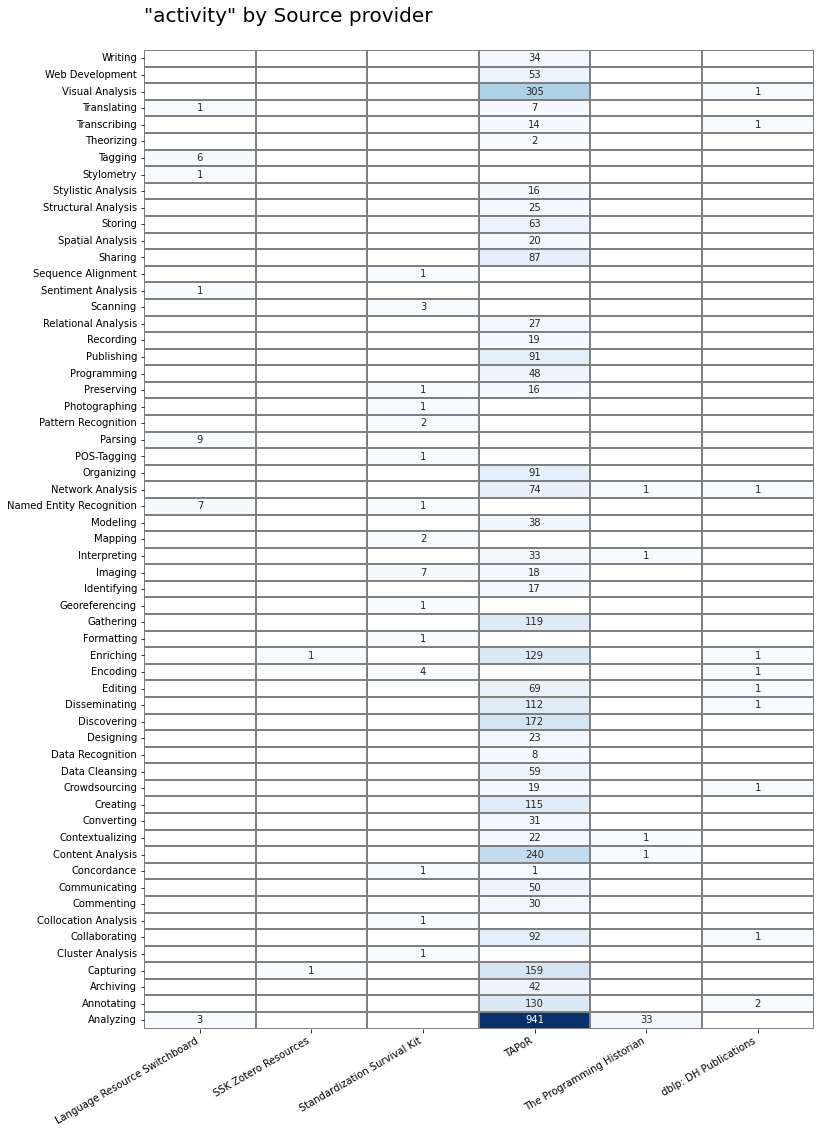

In [30]:
#change values in the next lines to resize the table
fig, ax = plt.subplots(figsize=(12, 18))
sns.heatmap(tt_a_df, annot=True, linewidths=0.1, fmt='.0f', ax=ax, cbar=None, cmap='Blues', linecolor='gray')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.invert_yaxis()
ax.set_xlabel(None)
ax.set_ylabel(None)
#sns.heatmap(df, linewidths=2, linecolor='yellow')
title = '"'+typecode+'" by Source provider\n'
plt.title(title, loc='left', fontsize=20)
plt.show()